In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style='darkgrid', font_scale=2)
import warnings
warnings.filterwarnings('ignore')

# Sklearn
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

# Models
from xgboost import XGBClassifier
from catboost import CatBoostClassifier

In [6]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('Test.csv')

df_train.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [7]:
r1,c1 = df_train.shape
print('The training data has {} rows and {} columns'.format(r1,c1))
r2,c2 = df_test.shape
print('The validation data has {} rows and {} columns'.format(r2,c2))

The training data has 8693 rows and 14 columns
The validation data has 4277 rows and 13 columns


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   8693 non-null   object 
 1   HomePlanet    8492 non-null   object 
 2   CryoSleep     8476 non-null   object 
 3   Cabin         8494 non-null   object 
 4   Destination   8511 non-null   object 
 5   Age           8514 non-null   float64
 6   VIP           8490 non-null   object 
 7   RoomService   8512 non-null   float64
 8   FoodCourt     8510 non-null   float64
 9   ShoppingMall  8485 non-null   float64
 10  Spa           8510 non-null   float64
 11  VRDeck        8505 non-null   float64
 12  Name          8493 non-null   object 
 13  Transported   8693 non-null   bool   
dtypes: bool(1), float64(6), object(7)
memory usage: 891.5+ KB


In [9]:
df_train.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [10]:
df_test.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,4186.000000,4195.000000,4171.000000,4179.000000,4176.000000,4197.000000
mean,28.658146,219.266269,439.484296,177.295525,303.052443,310.710031
std,14.179072,607.011289,1527.663045,560.821123,1117.186015,1246.994742
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,26.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,37.000000,53.000000,78.000000,33.000000,50.000000,36.000000
max,79.000000,11567.000000,25273.000000,8292.000000,19844.000000,22272.000000


In [11]:
# To see the quantity of null vaues in all the columns.
# c1 stands for the number of columns in the training data.


print('MISSING VALUES IN TRAINING DATASET:')
print(df_train.isna().sum().nlargest(c1))
print('')
print('MISSING VALUES IN VALIDATION DATASET:')
print(df_test.isna().sum().nlargest(c2))

MISSING VALUES IN TRAINING DATASET:
CryoSleep       217
ShoppingMall    208
VIP             203
HomePlanet      201
Name            200
Cabin           199
VRDeck          188
FoodCourt       183
Spa             183
Destination     182
RoomService     181
Age             179
PassengerId       0
Transported       0
dtype: int64

MISSING VALUES IN VALIDATION DATASET:
FoodCourt       106
Spa             101
Cabin           100
ShoppingMall     98
Name             94
CryoSleep        93
VIP              93
Destination      92
Age              91
HomePlanet       87
RoomService      82
VRDeck           80
PassengerId       0
dtype: int64


In [12]:
df_train.set_index('PassengerId',inplace=True)
df_test.set_index('PassengerId',inplace=True)

In [13]:
df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_train[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)
df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']] = df_test[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].fillna(0)

df_train['Age'] =df_train['Age'].fillna(df_train['Age'].median())
df_test['Age'] =df_test['Age'].fillna(df_test['Age'].median())

df_train['VIP'] =df_train['VIP'].fillna(False)
df_test['VIP'] =df_test['VIP'].fillna(False)

df_train['HomePlanet'] =df_train['HomePlanet'].fillna('Mars')
df_test['HomePlanet'] =df_test['HomePlanet'].fillna('Mars')

df_train['Destination']=df_train['Destination'].fillna("PSO J318.5-22")
df_test['Destination']=df_test['Destination'].fillna("PSO J318.5-22")

df_train['CryoSleep'] =df_train['CryoSleep'].fillna(False)
df_test['CryoSleep'] =df_test['CryoSleep'].fillna(False)

df_train['Cabin'] =df_train['Cabin'].fillna('T/0/P')
df_test['Cabin'] =df_test['Cabin'].fillna('T/0/P')

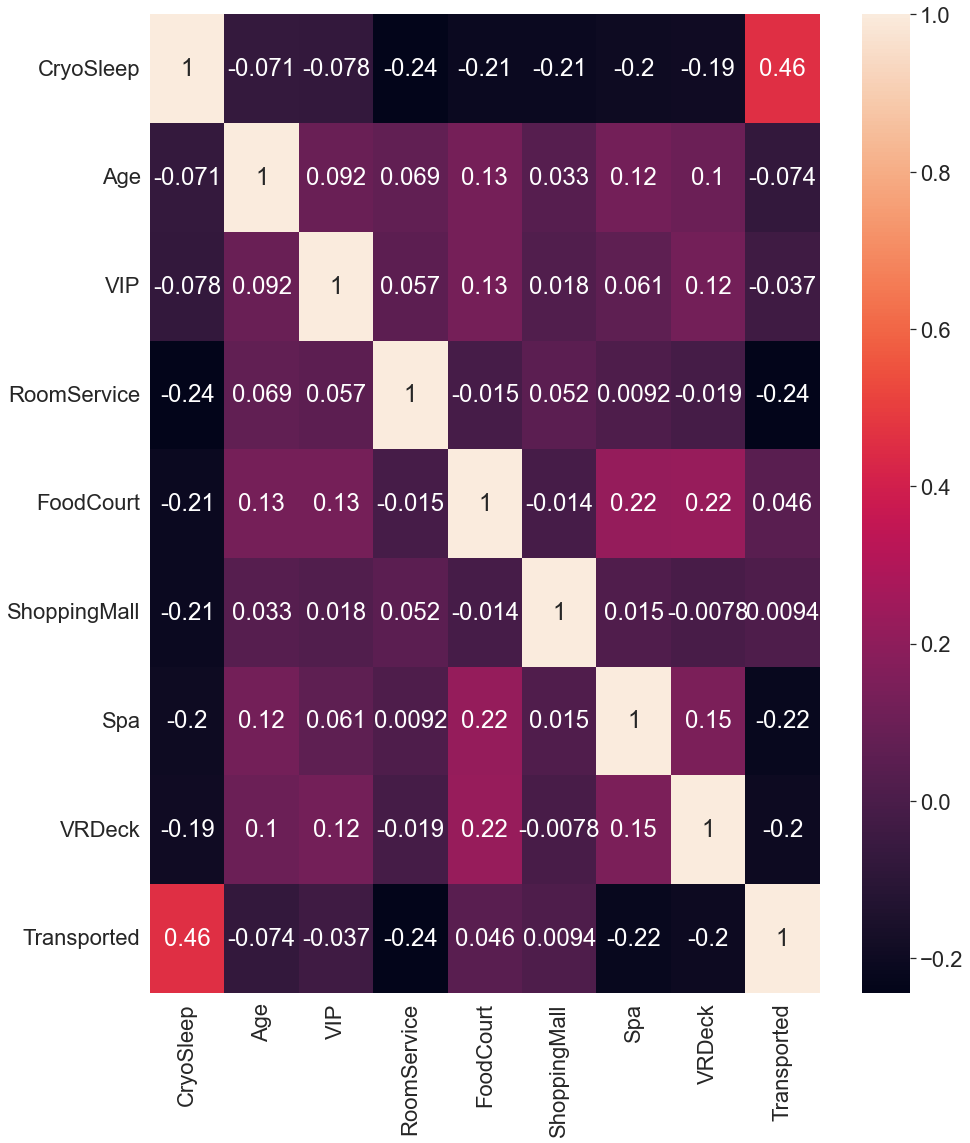

In [14]:
plt.figure(figsize=(15,18))
sns.heatmap(df_train.corr(), annot=True);

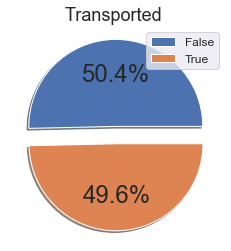

In [16]:
plt.pie(df_train.Transported.value_counts(), shadow=True, explode=[.1,.1], autopct='%.1f%%')
plt.title('Transported ', size=18)
plt.legend(['False', 'True'], loc='best', fontsize=12)
plt.show()

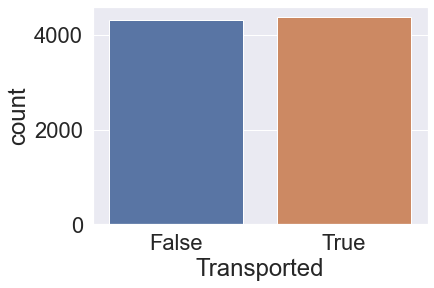

In [17]:
sns.countplot(df_train.Transported);

In [18]:
# Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
df_train[['Deck','Num','Side']] = df_train.Cabin.str.split('/',expand=True)
df_test[['Deck','Num','Side']] = df_test.Cabin.str.split('/',expand=True)

In [19]:
df_train['total_spent']= df_train['RoomService']+ df_train['FoodCourt']+ df_train['ShoppingMall']+ df_train['Spa']+ df_train['VRDeck']
df_test['total_spent']=df_test['RoomService']+df_test['FoodCourt']+df_test['ShoppingMall']+df_test['Spa']+df_test['VRDeck']

In [20]:
df_train['AgeGroup'] = 0
for i in range(6):
    df_train.loc[(df_train.Age >= 10*i) & (df_train.Age < 10*(i + 1)), 'AgeGroup'] = i
# Same for test data
df_test['AgeGroup'] = 0
for i in range(6):
    df_test.loc[(df_test.Age >= 10*i) & (df_test.Age < 10*(i + 1)), 'AgeGroup'] = i

In [21]:
from sklearn.preprocessing import LabelEncoder

categorical_cols= ['HomePlanet','CryoSleep','Destination','VIP','Deck','Side','Num']
for i in categorical_cols:
    print(i)
    le=LabelEncoder()
    arr=np.concatenate((df_train[i], df_test[i])).astype(str)
    le.fit(arr)
    df_train[i]=le.transform(df_train[i].astype(str))
    df_test[i]=le.transform(df_test[i].astype(str))

HomePlanet
CryoSleep
Destination
VIP
Deck
Side
Num


In [22]:
df_train.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,Deck,Num,Side,total_spent,AgeGroup
PassengerId,,,,,,,,,,,,,,,,,,
0001_01,1,0,B/0/P,2,39.0,0,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,1,0,0,0.0,3
0002_01,0,0,F/0/S,2,24.0,0,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,5,0,1,736.0,2
0003_01,1,0,A/0/S,2,58.0,1,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,0,0,1,10383.0,5
0003_02,1,0,A/0/S,2,33.0,0,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,0,0,1,5176.0,3
0004_01,0,0,F/1/S,2,16.0,0,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,5,1,1,1091.0,1


In [23]:
df_train= df_train.drop(['Name','Cabin'],axis=1)
df_test= df_test.drop(['Name','Cabin'],axis=1)

In [24]:
df_train['Transported']=df_train['Transported'].replace({True:1,False:0})

In [25]:
X=df_train.drop('Transported',axis=1)
y = df_train['Transported']

In [26]:
X.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'RoomService',
       'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck', 'Deck', 'Num', 'Side',
       'total_spent', 'AgeGroup'],
      dtype='object')

In [27]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, random_state=0)

In [28]:
from catboost import CatBoostClassifier
model=CatBoostClassifier(iterations=1500,
                         eval_metric='Accuracy',
                        verbose=0)

In [29]:
model.fit(X_train,y_train)

In [30]:
pred_y=model.predict(X_val)

pred=model.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8792759625709464
0.8104875804967802


In [31]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=1,n_estimators=250,learning_rate=0.15,max_depth=3)
gb.fit(X_train,y_train)

GradientBoostingClassifier(learning_rate=0.15, n_estimators=250, random_state=1)

In [32]:
pred_y=gb.predict(X_val)
pred=gb.predict(X_train)
    
print(accuracy_score(y_train.values,pred))
print(accuracy_score(y_val.values,pred_y))

0.8665439484583525
0.8031278748850046


In [33]:
# lets re fit the model on the entire data
model.fit(X,y)

In [34]:
for i,z in zip(X.columns,model.get_feature_importance()):
    print('importance of',i,'is',z)

importance of HomePlanet is 8.160513975786111
importance of CryoSleep is 4.701345618453002
importance of Destination is 2.393081923525893
importance of Age is 5.126439274507989
importance of VIP is 0.10828162130174969
importance of RoomService is 5.875480047893343
importance of FoodCourt is 7.89382276219402
importance of ShoppingMall is 4.496323111836976
importance of Spa is 9.426856892675929
importance of VRDeck is 8.585295660177286
importance of Deck is 14.60286377787421
importance of Num is 8.891779133600641
importance of Side is 4.327715657049877
importance of total_spent is 13.785245978119411
importance of AgeGroup is 1.6249545650035764


In [35]:
y_pred = model.predict(df_test)

sub=pd.DataFrame({'Transported':y_pred.astype(bool)},index=df_test.index)

sub.head()

,Transported
PassengerId,
0013_01,False
0018_01,False
0019_01,True
0021_01,True
0023_01,False


In [37]:
sub.to_csv('submission1.csv')